# Churn Predictor: Forecasting Customer Churn with Machine Learning

# Business Understanding

## Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

### Overview
The purpose of this project is to develop a machine learning model for binary classification. The model will predict whether a given instance belongs to one of two classes based on a set of input features.

### Background
Vodafone, a telecommunication company want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be applied to avert this problem.

### Project Ojectives
- Develop and train a machine learning model using historical data to predict whether a customer will churn or not.
- Evaluate the model's performance using appropriate metrics : accuracy,precision,recall,f1-score.
- Fine-tune the model parameters with GridSearchCv to optimize performance.
- Perform hypothesis testing to reject or fail to reject the null hypothesis


### Data for the project
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Data Dictionary

| Feature           | Description                                                | Data Type|
|-------------------|------------------------------------------------------------|-----------| 
| Gender            | Whether the customer is a male or a female                 |Object|
| SeniorCitizen     | Whether a customer is a senior citizen or not              |Object|
| Partner           | Whether the customer has a partner or not (Yes, No)        |Object|
| Dependents        | Whether the customer has dependents or not (Yes, No)       |Object|
| Tenure            | Number of months the customer has stayed with the company |Number|
| Phone Service     | Whether the customer has a phone service or not (Yes, No)  |Object|
| MultipleLines     | Whether the customer has multiple lines or not            |Object|
| InternetService   | Customer's internet service provider (DSL, Fiber Optic, No)|Object|
| OnlineSecurity    | Whether the customer has online security or not (Yes, No, No Internet)|Object|
| OnlineBackup      | Whether the customer has online backup or not (Yes, No, No Internet)|Object|
| DeviceProtection  | Whether the customer has device protection or not (Yes, No, No internet service)|Object|
| TechSupport       | Whether the customer has tech support or not (Yes, No, No internet)|Object|
| StreamingTV       | Whether the customer has streaming TV or not (Yes, No, No internet service)|Object|
| StreamingMovies   | Whether the customer has streaming movies or not (Yes, No, No Internet service)|Object|
| Contract          | The contract term of the customer (Month-to-Month, One year, Two year)|Object|
| PaperlessBilling  | Whether the customer has paperless billing or not (Yes, No)|Object|
| Payment Method    | The customer's payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))|Object|
| MonthlyCharges    | The amount charged to the customer monthly| Number|
| TotalCharges      | The total amount charged to the customer|Number|                   
| Churn             | Whether the customer churned or not (Yes or No), **target variable**          |Object|


### Business Sucess Criteria
- Model accuracy: The model's accuracy should be above 70%
- Retention Strategy Effectiveness: The implemented retention strategies should show a measurable impact on reducing customer churn rates. This can be assessed by comparing churn rates before and after implementing the strategies.
- Cost Reduction: The model should contribute to reducing the costs associated with customer acquisition by identifying at-risk customers early on and allowing targeted retention efforts.
- Customer Satisfaction: While focusing on retention, the model and strategies should also aim to maintain or improve customer satisfaction levels. High customer satisfaction leads to increased loyalty and potentially higher customer lifetime value.
- Adaptability and Scalability: The developed model should be adaptable to changing business environments and scalable to accommodate larger datasets or additional features. This ensures its long-term viability and usefulness for the company.
- Feedback and Iteration: Continuous feedback loops should be established to gather insights from the model's predictions and refine the retention strategies accordingly. This iterative process ensures ongoing improvement and optimization of the churn prediction system.

### Future Work
Deploy the model to be used in the company's mobile/web application


## Hypothesis Statement
- **Null Hypothesis (Ho)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

- **Alternative Hypothesis (Ha)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn.

## Business Questions
1. What is the rate of churn by demographics?
2. How do different levels of monthly customer charges impact churn rates?
3. Do customers who pay more monthly charges tend to stay longer? 
4. What is the prefered service [Streaming movies, streaming TV] gender?
5. What impact does the prefered service has on customer churn?
6. Are customers on long-term contracts less likely to churn?
7. How does does the relationship between monthly charges and churn differ based on contract duration?
8. What impact does the ISPs have on customer churn?
9. Which Internet Service Provider accounts for the most charges?
10. What is the effect of method of payment on customer churn?


## Data Understanding 

### Library Importation

In [6]:
import pickle
import os
# data manipulation tools
import pandas as pd
import numpy as np
import missingno as msno
# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics librabry  

from scipy import stats
from scipy.stats import randint,uniform
import statistics as  stat

# database connections
import pyodbc
from dotenv import load_dotenv,dotenv_values

# data preprocessing packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, RobustScaler,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import phik
from phik import phik_matrix

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# metrics packages
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV
# roc curve
# feature importance


# hide warnings
import warnings
warnings.filterwarnings("ignore")


## Data Loading

### Set up database connection

In [7]:
# load environment variables
environment_variables = dotenv_values("../.env")

# load database configurations
database = environment_variables.get("DB_DATABASENAME")
username = environment_variables.get("DB_USERNAME")
password = environment_variables.get("DB_PASSWORD")
server_name = environment_variables.get("DB_SERVERNAME")



# define connection string
connection_string = f"DRIVER={{SQL SERVER}};SERVER={server_name};DATABASE={database};UID={username};PWD={password}"

In [8]:
# setup connection
connector = pyodbc.connect(connection_string)

In [9]:
# query the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query,connector)

In [10]:
# load first five rows
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
# check for column names
df_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# loading the excel dataset 
df_2 = pd.read_csv("../data/LP2_Telco-churn-second-2000.csv")
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [13]:
# check for the column names of the second dataset
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Concatenate DataFrames 

In [14]:
# concatenate data
train_df = pd.concat([df_1,df_2],ignore_index=True)


## Exploratory Data Analysis

In [15]:
# check the first five rows
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [16]:
# view the last five rows
train_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [17]:
# check the shape of the dataset
train_df.shape

(5043, 21)

#### Rename Labels

In [18]:
columns = {"tenure":"Tenure","gender":"Gender","customerID":"CustomerID"}
train_df.rename(columns=columns,inplace=True)

It can be seen from the shape that the training dataset have 5043 rows and 21 columns

In [19]:
# information about the dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5043 non-null   object 
 1   Gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   Tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## Information About The Data 
- There are null values present in the following columns: MultipleLines, Online Security, OnlineBackup, DeviceProtection  ,TechSupport ,StreamingTV , StreamingMovies, Total Charges and Churn which will be looked at and the appropriate action to be taken on
- The total charges column has an object data type which is supposed to be a numerical data type

## Course of Action
- Analyze the Null values in the individual columns to decide to drop or fill them where necessary
- Convert Data Type of Total Charges to  Float


In [20]:
# Checking for duplicates 
train_df.duplicated().sum()


0

#### Check for Unique Values

In [21]:
# Checking for nunique
train_df.nunique()

CustomerID          5043
Gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
Tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [22]:
# Define a function to check for the number of unique values in categorical columns
def check_unique_values(df):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in train_df.columns:
        # Check if the column is categorical (object type) and not the 'customerID' column
        if ((train_df[col].dtype == 'object') or (train_df[col].dtype == 'bool')) and (col != 'customerID'):
            # Print the column name and its unique values
            print(col, '---->', train_df[col].unique())

In [23]:
# Call the function to check unique values for the dataFrame
check_unique_values(train_df)

Checking unique values in categorical columns:
CustomerID ----> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender ----> ['Female' 'Male']
Partner ----> [True False 'No' 'Yes']
Dependents ----> [False True 'No' 'Yes']
PhoneService ----> [False True 'Yes' 'No']
MultipleLines ----> [None False True 'No' 'No phone service' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [False True None 'No' 'Yes' 'No internet service']
OnlineBackup ----> [True False None 'No' 'Yes' 'No internet service']
DeviceProtection ----> [False True None 'No' 'Yes' 'No internet service']
TechSupport ----> [False True None 'Yes' 'No' 'No internet service']
StreamingTV ----> [False True None 'No' 'Yes' 'No internet service']
StreamingMovies ----> [False True None 'No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [True False 'Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed che

#### Checking for Null Values

In [24]:
# Checking for missing values 
train_df.isnull().sum()

CustomerID            0
Gender                0
SeniorCitizen         0
Partner               0
Dependents            0
Tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [25]:
# Checking for percentage of missing values 
(train_df.isnull().sum()/(len(train_df)))*100

CustomerID           0.000000
Gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
Tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

<Axes: >

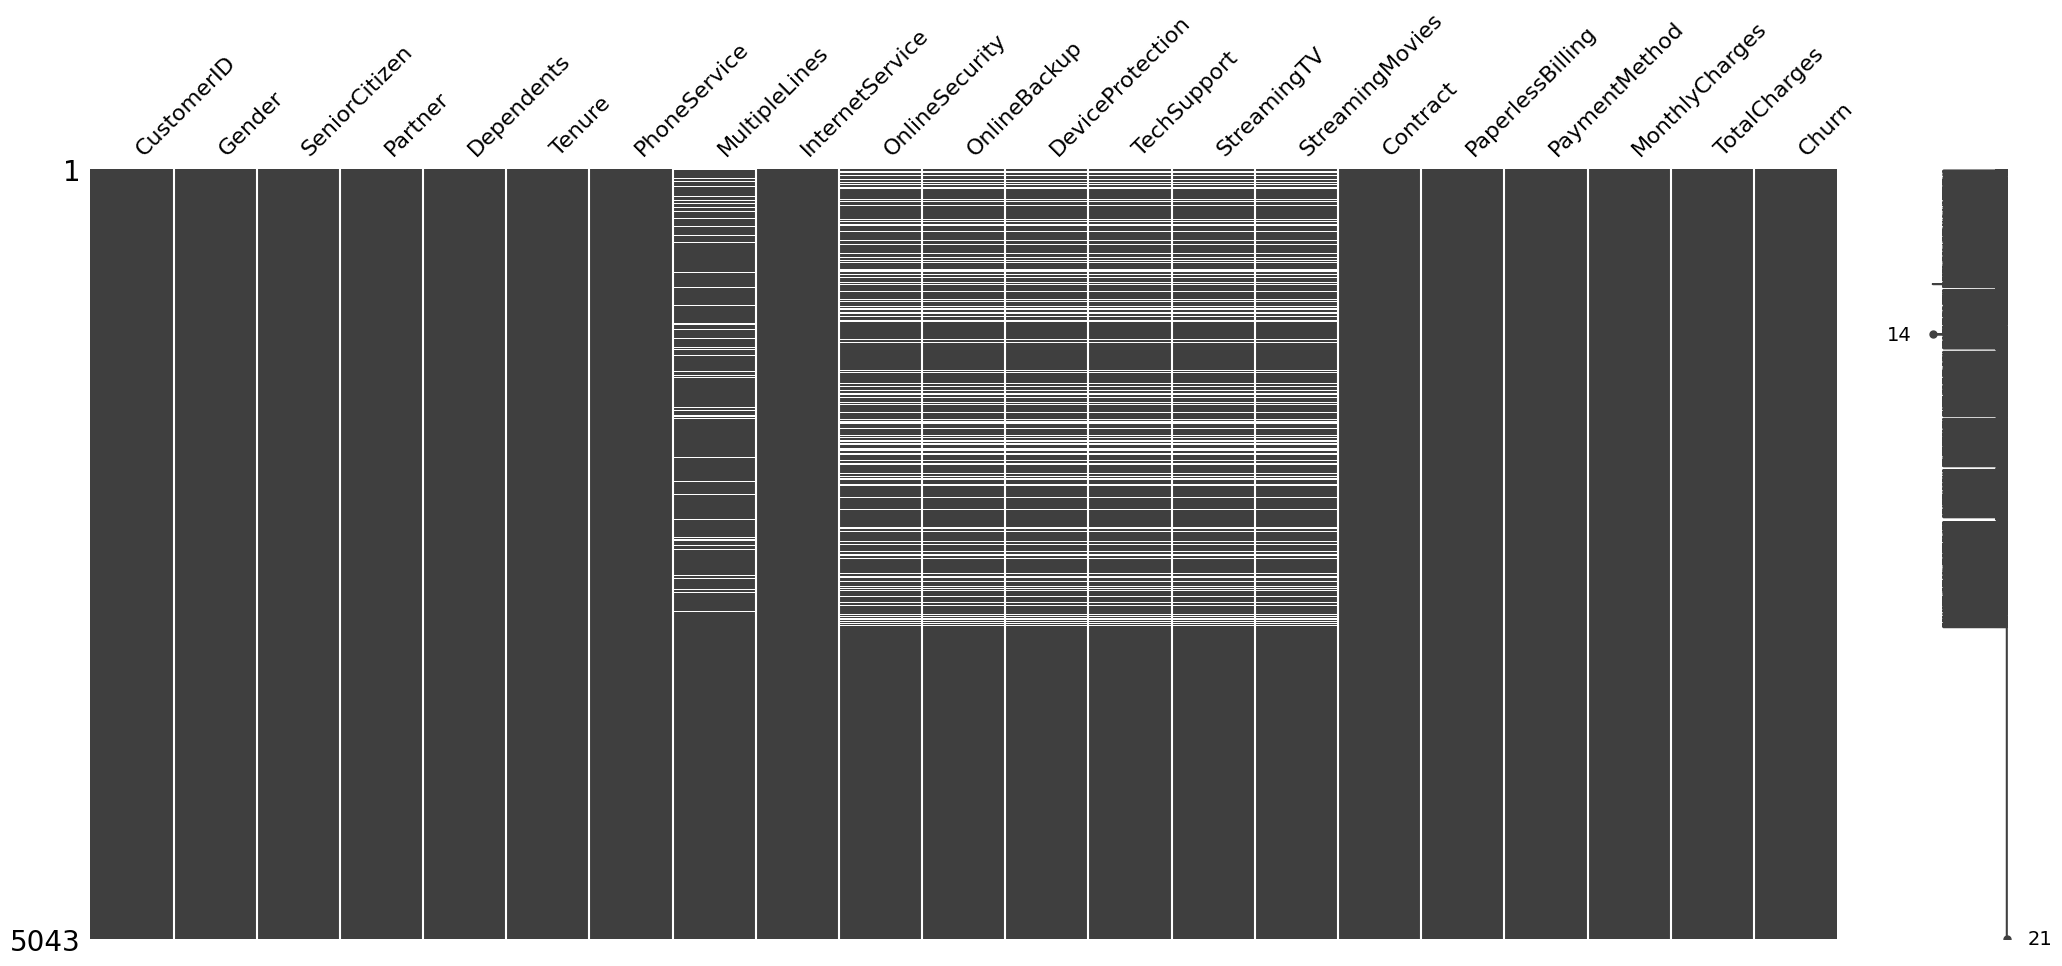

In [26]:
# Visualize missing data pattern using matrix plot
msno.matrix(train_df)

#### Descriptive Analysis On The Dataframe


In [27]:
# calling the describe method on the train_df
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
Tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


## Observations On The Data
The following was observed
***SeniorCitizen*** : The mean value of 0.162 suggests that approximately 16.24% of the customers in the dataset are senior citizens.The standard deviation of 0.369 indicates some variability in the distribution of senior citizen status among customers and the minimum value of 0 implies that there are non-senior customers in the dataset.

***Tenure*** : On average, customers stay with the service provider for approximately 32.58 months.The minimum tenure is 0 months, which could indicate newly acquired customers anf the maximum tenure is 72 months, indicating some customers have been with the provider for a significant period.The standard deviation of 24.53 suggests that there is a considerable variation in tenure lengths among customers.

***MonthlyCharges*** : The minimum monthly charge is $18.40, while the maximum is $118.65 and on average, customers are charged approximately $65.09 per month.The standard deviation of 30.07 indicates variability in monthly charges among customers.

***TotalCharges*** : On average, customers have been charged a total of approximately $2302.06 while The minimum total charge is $18.80, while the maximum is $8670.10. The standard deviation of $2269.48 suggests significant variability in total charges among customers.

## Data Quality Issues

#### Univariate Analysis


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

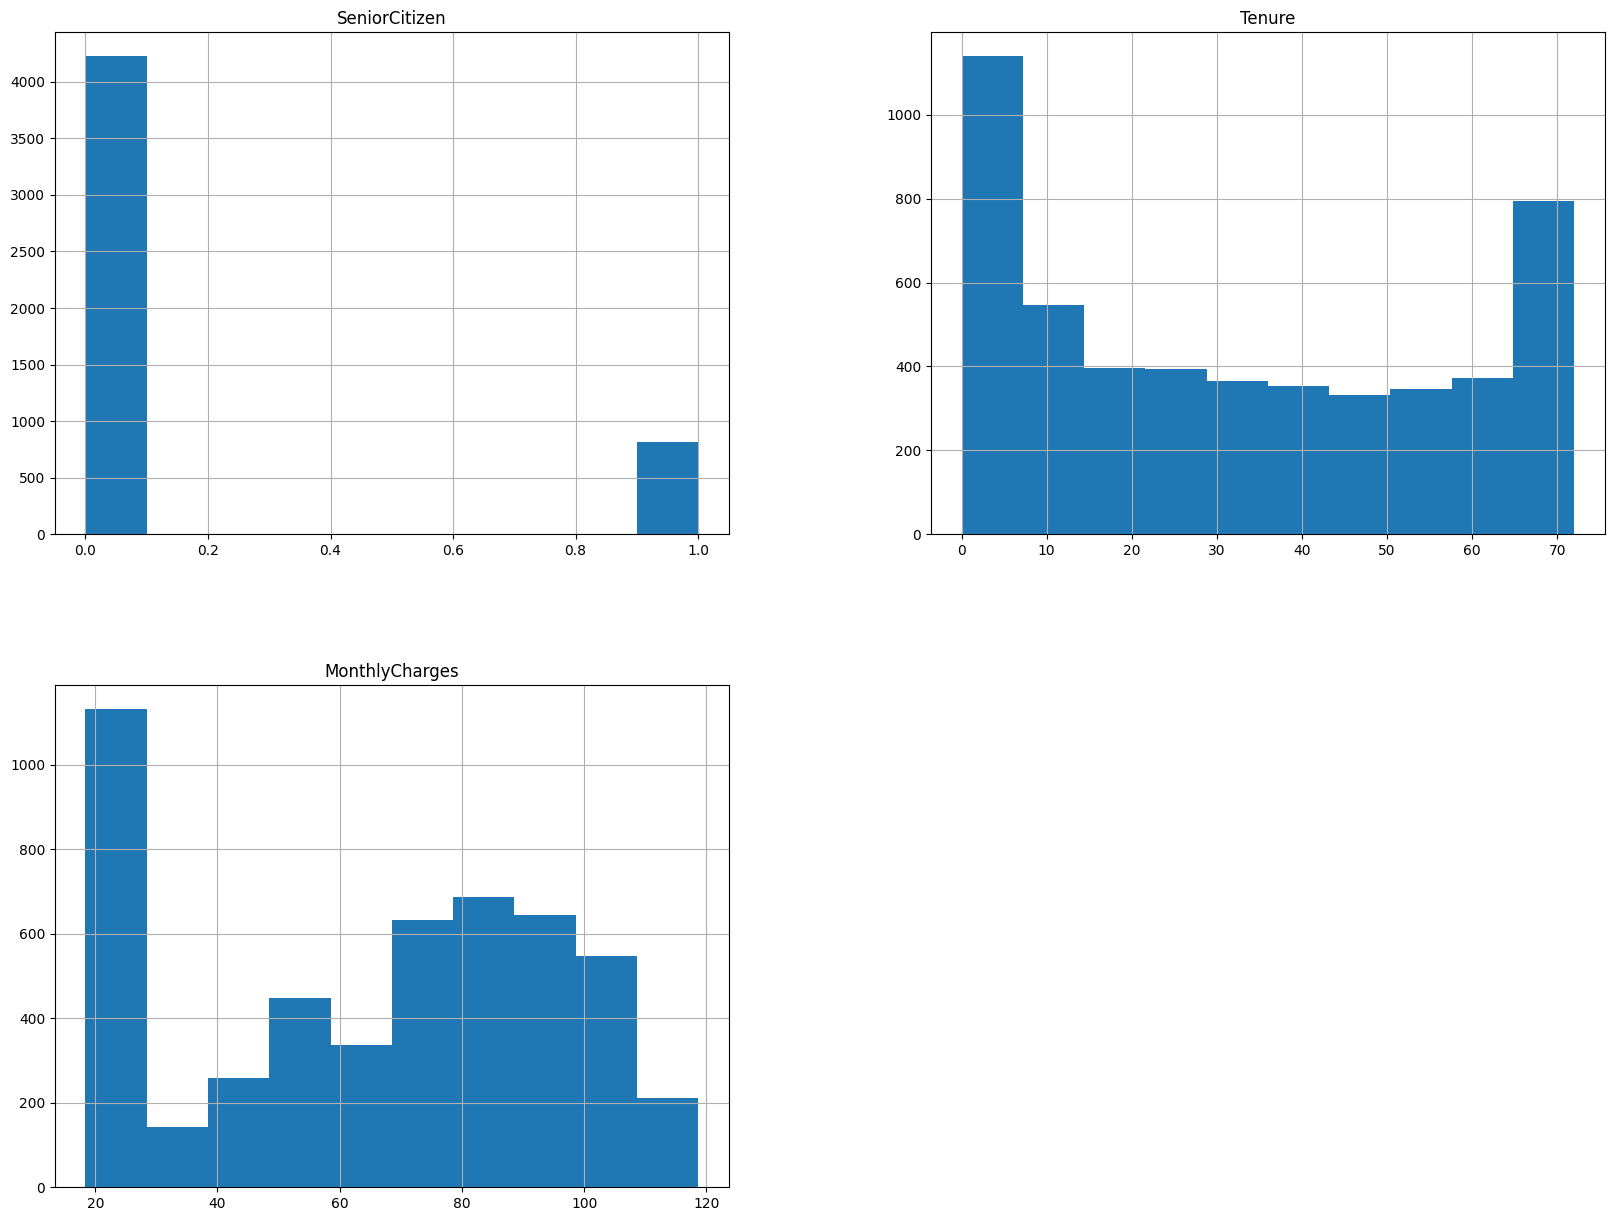

In [28]:
# Visualize the Distribution of the variables
train_df.hist(figsize=(20, 15))

In [29]:
# Test 

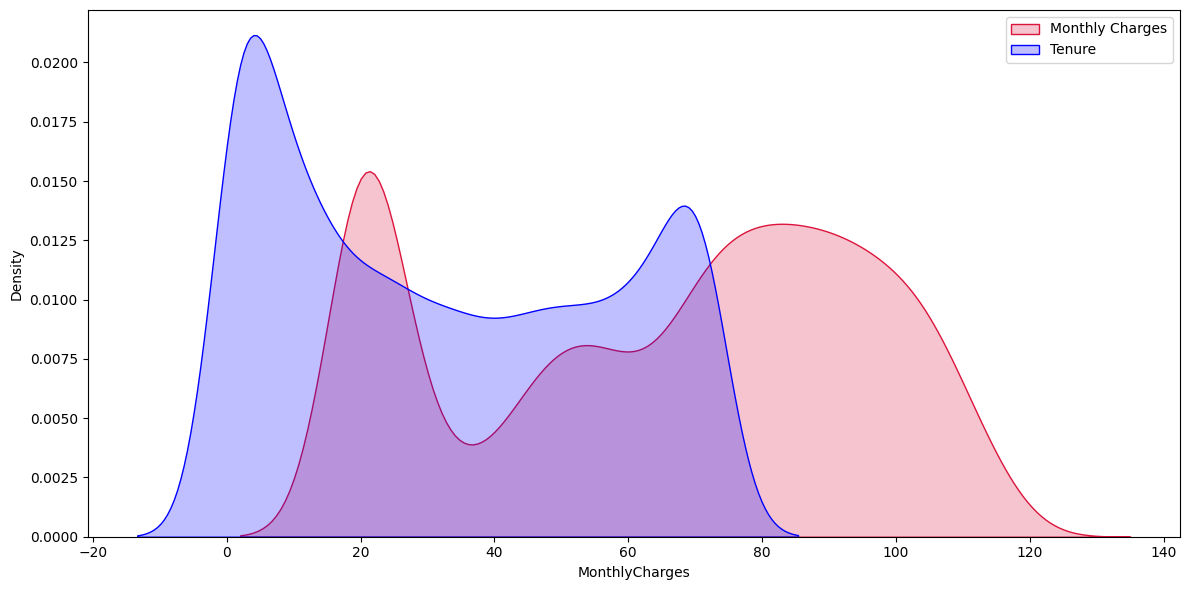

In [30]:
# check for normal distribution with KDE

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=train_df,x='MonthlyCharges', shade = True,
            color='crimson', label='Monthly Charges', fill=True, ax=ax)
sns.kdeplot(data=train_df,x='Tenure', shade = True,
            color='blue', label='Tenure', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='Density'>

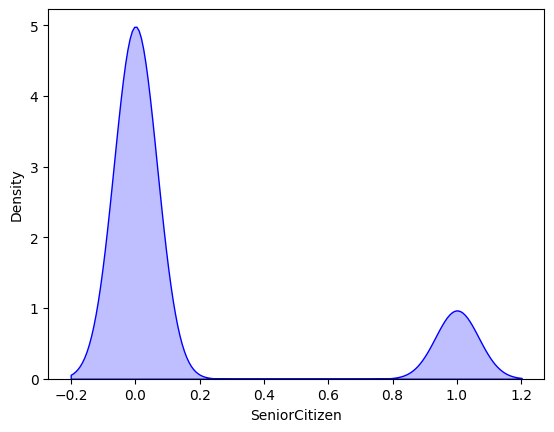

In [31]:
sns.kdeplot(data=train_df,x='SeniorCitizen', shade = True,
            color='blue', label='SeniorCitizen', fill=True)

#### Outliers Analysis With Box Plot

<Axes: >

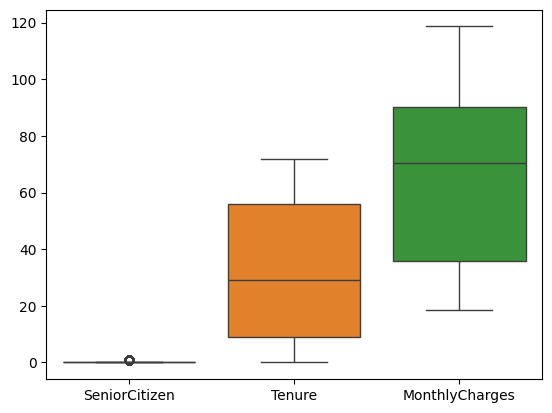

In [32]:
# visuaization with box plot
sns.boxplot(train_df)

There are no outliers in the dataset


<Axes: ylabel='count'>

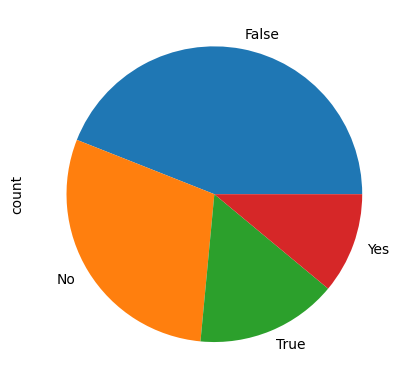

In [33]:
# Ananlyze the Churn column
churn_count = train_df["Churn"].value_counts()
churn_count.plot(kind="pie")

## Bivariate Analysis

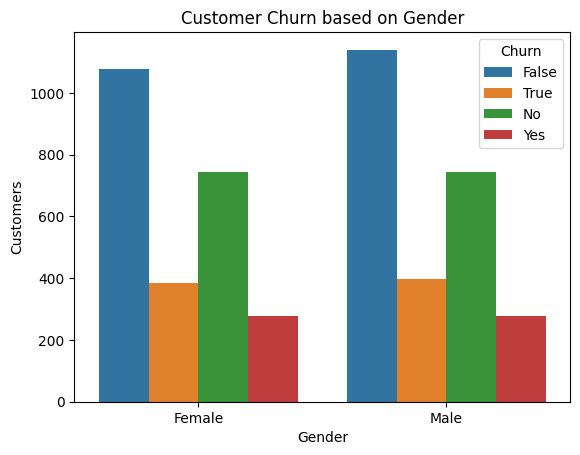

In [34]:
# Relationship beyween Customer Churn and Gender
sns.countplot(data=train_df,x='Gender',hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Customer Churn based on Gender')
plt.show()

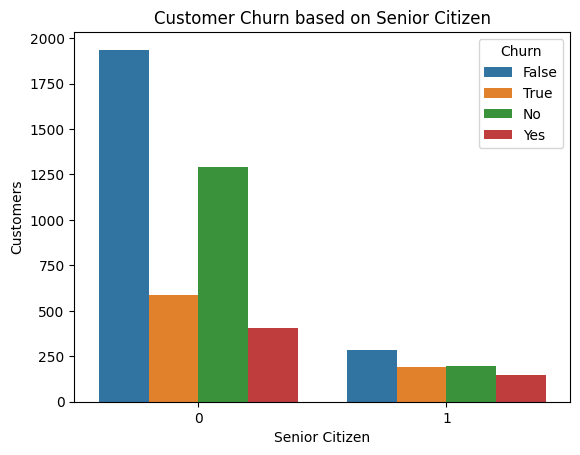

In [35]:
# Relationship between Churn and SeniorCitizen
sns.countplot(data=train_df, x='SeniorCitizen',hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer Churn based on Senior Citizen')
plt.show()

## Observation
From The visualization above, we can see that the churn column consist of 4 categories: True,False,Yes,No

## Course of Action
Convert all the No to False and Yes to True to ensure consistency in the column


## Data Preparation

#### Data Cleaning

In [36]:
# Restructure the Churn Column
train_df["Churn"].replace({True:"Yes",False:"No"},inplace=True)

In [37]:
# confirm changes
train_df["Churn"].unique()

array(['No', 'Yes', None], dtype=object)

In [38]:
# check for Null Values within the Churn column
train_df["Churn"].isna().sum() 

1

In [39]:
# drop the row with null value
train_df.dropna(subset=["Churn"],axis=0,inplace=True)

# confirm changes
train_df["Churn"].isna().sum() 

0

In [40]:

def map_values(df,columns_to_map):
    for col in columns_to_map:
        cat_mapping = {True:"Yes",False:"No"}
        df[col] = df[col].replace(cat_mapping)
    return df

In [41]:
# call the map_values function
first_batch = ["PaperlessBilling","Partner","Dependents","PhoneService"]
map_values(train_df,columns_to_map=first_batch) 

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,False,...,False,False,False,False,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,False,DSL,True,...,True,False,False,False,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,False,DSL,True,...,False,False,False,False,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,True,...,True,True,False,False,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,False,Fiber optic,False,...,False,False,False,False,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [42]:
# confirm changes
for col in first_batch:
    print(f"{col}","========",train_df[col].unique())

PaperlessBilling ======== ['Yes' 'No']
Partner ======== ['Yes' 'No']
Dependents ======== ['No' 'Yes']
PhoneService ======== ['No' 'Yes']


In [43]:
# create values_mapper column
def values_mapper(df,columns_to_map):
    """ This function takes two parameters and map the values in the column
    df: dataframe object
    columns_columns: columnsin in the dataframe that you want to map the values
    returns dataframe
    """
    for col in columns_to_map:
        cat_mapping = {True:"Yes",False:"No","No internet service":"No","No phone service":"No"}
        df[col] = df[col].replace(cat_mapping)
    return df

In [44]:
second_batch = ["StreamingMovies","StreamingTV","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"]
values_mapper(df=train_df,columns_to_map=second_batch)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [45]:
# confirm changes
for col in second_batch:
    print(f"{col}","========",train_df[col].unique())

StreamingMovies ======== ['No' 'Yes' None]
StreamingTV ======== ['No' 'Yes' None]
MultipleLines ======== [None 'No' 'Yes']
OnlineSecurity ======== ['No' 'Yes' None]
OnlineBackup ======== ['Yes' 'No' None]
DeviceProtection ======== ['No' 'Yes' None]
TechSupport ======== ['No' 'Yes' None]


In [46]:
# Call the function to check unique values for the dataFrame
check_unique_values(train_df)

Checking unique values in categorical columns:
CustomerID ----> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender ----> ['Female' 'Male']
Partner ----> ['Yes' 'No']
Dependents ----> ['No' 'Yes']
PhoneService ----> ['No' 'Yes']
MultipleLines ----> [None 'No' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> ['No' 'Yes' None]
OnlineBackup ----> ['Yes' 'No' None]
DeviceProtection ----> ['No' 'Yes' None]
TechSupport ----> ['No' 'Yes' None]
StreamingTV ----> ['No' 'Yes' None]
StreamingMovies ----> ['No' 'Yes' None]
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> ['Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ----> [29.850000381469727 1889.5 108.1500015258789 ... '346.45' '306.6' '6844.5']
Churn ----> ['No' 'Yes']


#### Convert Data Type of Total Charges to Float

In [47]:
# Replace non-numeric values with NaN
train_df["TotalCharges"] = pd.to_numeric(train_df["TotalCharges"], errors="coerce")

# convert data type to float
train_df["TotalCharges"] = train_df["TotalCharges"].astype("float")

#### Checking For Class Imbalance

In [48]:
train_df["Churn"].value_counts().rename("Total Churn").reset_index()

,Churn,Total Churn
0,No,3706
1,Yes,1336


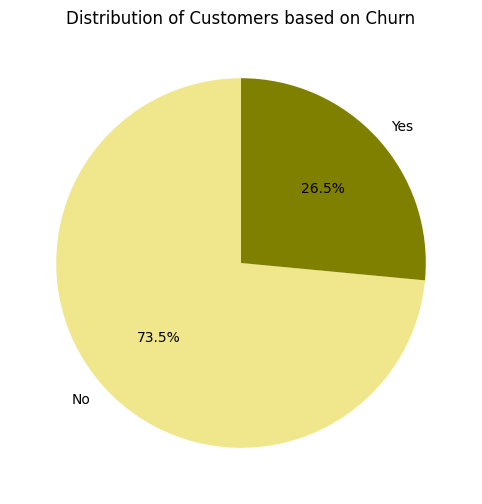

In [49]:
#checking if the churn column is unbalanced
plt.figure(figsize =(10,6))
colors = [ 'khaki', 'olive']
plt.pie(x=train_df['Churn'].value_counts().values,labels=train_df['Churn'].value_counts().index, autopct='%.1f%%',
        startangle=90,colors=colors)
plt.title('Distribution of Customers based on Churn')
plt.show()

#### Feature Selection Using Phik_Matrix

interval columns not set, guessing: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']


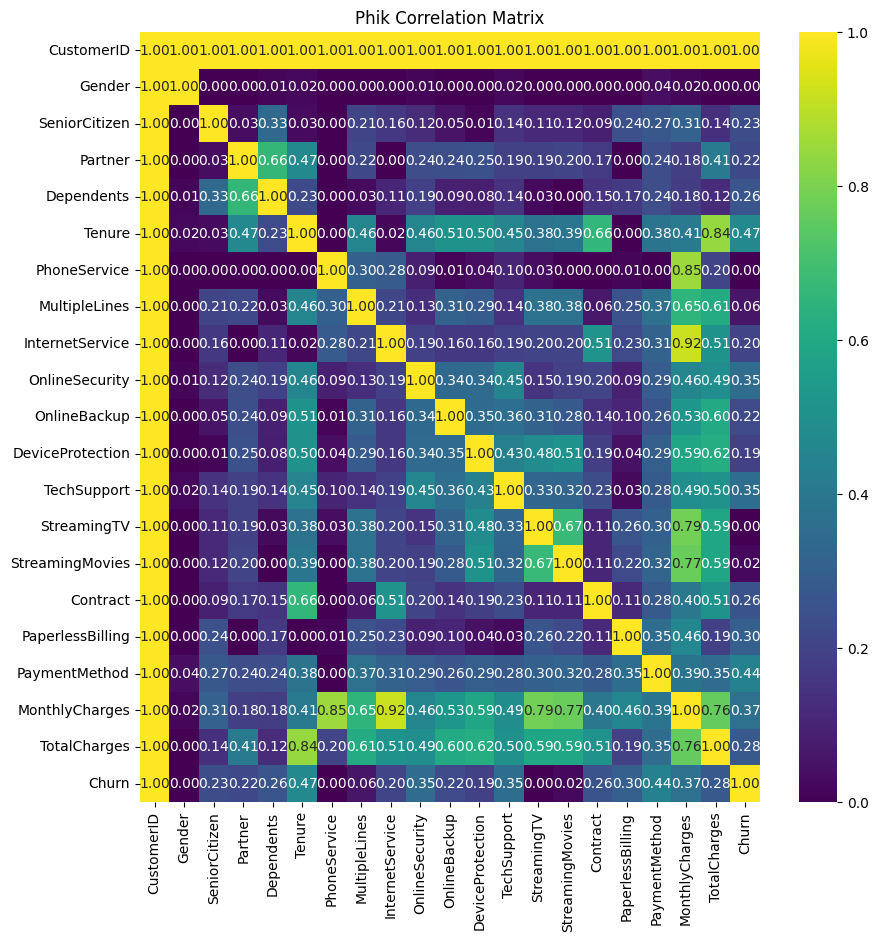

In [50]:
# compute the Phik Correlation Matrix
correlation_matrix = train_df.phik_matrix() 


plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap="viridis",fmt=".2f")
plt.title("Phik Correlation Matrix")
plt.show()


#### Selecting Relevant Columns For Training

In [51]:
train_df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Split DataFrame Into Training and Evaluation Dataset

In [52]:
# Relevant Features
relevant_columns = ["Tenure","PaymentMethod", "MonthlyCharges", "Churn","Contract","PaperlessBilling","Dependents"]
train_df = train_df[relevant_columns]

# Feature Variables
X = train_df.drop(columns="Churn")

# target variable
y = train_df["Churn"]



In [53]:
# preview first five features
X.head()

,Tenure,PaymentMethod,MonthlyCharges,Contract,PaperlessBilling,Dependents
0,1,Electronic check,29.850000,Month-to-month,Yes,No
1,34,Mailed check,56.950001,One year,No,No
2,2,Mailed check,53.849998,Month-to-month,Yes,No
3,45,Bank transfer (automatic),42.299999,One year,No,No
4,2,Electronic check,70.699997,Month-to-month,Yes,No


#### Train Test Split

In [54]:
# train test split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
# Checking the shape of the training dataset
print("shape of the X_train dataset:")
X_train.shape,y_train.shape


shape of the X_train dataset:


((4033, 6), (4033,))

In [56]:
# Check the shape of the evaluation dataset
print("shape of the X_val dataset:")
X_val.shape,y_val.shape


shape of the X_val dataset:


((1009, 6), (1009,))

#### Encoding The Target Variable 

In [57]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

#### Preparing Pipelines

In [58]:
# Check for Categoricals 
categorical_columns = X.select_dtypes("object").columns
categorical_columns

Index(['PaymentMethod', 'Contract', 'PaperlessBilling', 'Dependents'], dtype='object')

In [59]:
# Check for Numericals 
numeric_columns = X.select_dtypes("number").columns 
numeric_columns

Index(['Tenure', 'MonthlyCharges'], dtype='object')

In [60]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5042.0,32.568822,24.525954,0.0,9.0000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.4,35.7625,70.550003,90.050002,118.650002


In [61]:
# create function to handle preprocessing of data for training pipeline to handle numerical values 
numerical_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy="median")),
    ('num_scaler',RobustScaler()),
    ('log_transformer',FunctionTransformer(np.log1p))
    ])

    # create pipeline to handle categorical values
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('cat_encoder',OneHotEncoder())   
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline',numerical_pipeline,numeric_columns),
    ('cat_pipeline',categorical_pipeline,categorical_columns)
   ])    


#### Key Insights From The Data Preparation Stage

1. The Churn column/label column was found to be imbalanced which must be looked at
2. From the Phi-K matrix, the features most important for data modelling are:

- Tenure
- Payment method
- Monthly charges
- Paperless billing
- Dependents
- Contracts
- Total Charges

The features were then further investigated for multicollinearity. The following were flagged:

- Tenure and total charges with a correlation coefficient of 0.84
- Total charges and monthly charges with a correlation coefficient of 0.76

It was very interesting to observe that monthly charges were highly correlated with "luxury" services.


##### Action to take
- Exclude totalcharges from the data modeling
- Drop the other columns not identified significant for modeling

#### Modeling

In [62]:
models = [
    ('log_regression',LogisticRegression(random_state=42)),
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('random_forest',RandomForestClassifier(random_state=42)),
    ('sgb_classiffier',GradientBoostingClassifier(random_state=42)),
    ('catboost',CatBoostClassifier(random_state=42))
    ]

#### Training Models On Unbalanced Data

In [63]:
all_pipelines = {}

# define table to hold all the metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

# loop through the models
for model_name, classifier in models:
# build final pipeline with preprocessor estimator
    final_pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('estimator', classifier)
    ])

    # fit training data to final pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    # add models to all_pipeline dictionary
    all_pipelines[model_name] = final_pipeline

    # make prediction
    y_predict = final_pipeline.predict(X_val)

    # Generate Classification report for each pipeline or model
    metrics = classification_report(y_val_encoded, y_predict, output_dict=True)
        
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
metrics_table.sort_values(by="f1_score", ascending=False)

Learning rate set to 0.018687
0:	learn: 0.6808573	total: 183ms	remaining: 3m 3s
1:	learn: 0.6688222	total: 189ms	remaining: 1m 34s
2:	learn: 0.6584658	total: 194ms	remaining: 1m 4s
3:	learn: 0.6465689	total: 201ms	remaining: 50.1s
4:	learn: 0.6370949	total: 207ms	remaining: 41.1s
5:	learn: 0.6263499	total: 212ms	remaining: 35.1s
6:	learn: 0.6171661	total: 217ms	remaining: 30.8s
7:	learn: 0.6082964	total: 222ms	remaining: 27.6s
8:	learn: 0.6002625	total: 228ms	remaining: 25.1s
9:	learn: 0.5925943	total: 233ms	remaining: 23.1s
10:	learn: 0.5843669	total: 238ms	remaining: 21.4s
11:	learn: 0.5768921	total: 243ms	remaining: 20s
12:	learn: 0.5699158	total: 249ms	remaining: 18.9s
13:	learn: 0.5630467	total: 254ms	remaining: 17.9s
14:	learn: 0.5570930	total: 260ms	remaining: 17.1s
15:	learn: 0.5505152	total: 266ms	remaining: 16.4s
16:	learn: 0.5458016	total: 272ms	remaining: 15.7s
17:	learn: 0.5403255	total: 277ms	remaining: 15.1s
18:	learn: 0.5359648	total: 281ms	remaining: 14.5s
19:	learn: 0

,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,log_regression,0.807730,0.807730,0.807730,0.807730,"[[662, 97], [97, 153]]"
5,catboost,0.808722,0.804638,0.808722,0.806415,"[[671, 88], [105, 145]]"
4,sgb_classiffier,0.805748,0.802755,0.805748,0.804122,"[[667, 92], [104, 146]]"
2,knn,0.772052,0.776452,0.772052,0.774095,"[[637, 122], [108, 142]]"
3,random_forest,0.762141,0.763425,0.762141,0.762770,"[[637, 122], [118, 132]]"
1,decision_tree,0.722498,0.735409,0.722498,0.728153,"[[602, 157], [123, 127]]"


#### Visualing Models' f1-score On a Bar Chart

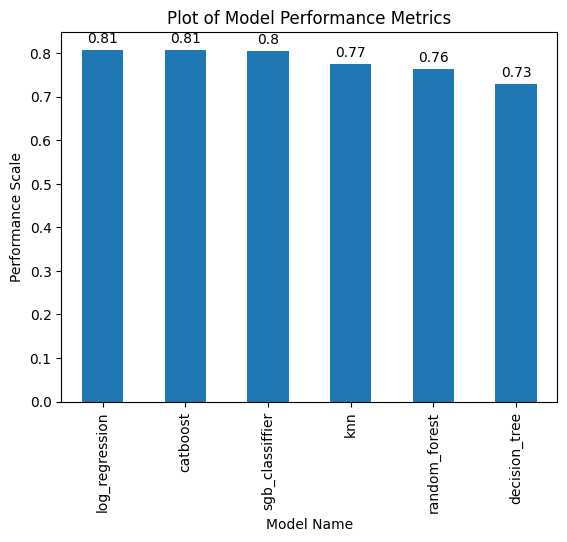

In [64]:
# display metrics table based on the ascending order of f1_score
# set model_name as index
top_models = metrics_table.set_index("model_name")
f1_scores = top_models['f1_score'].sort_values(ascending=False)

# reset_index to model_name

bar = f1_scores.plot(kind="bar")

# Add data labels to the bars
for i, v in enumerate(f1_scores):
    bar.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.title("Plot of Model Performance Metrics")
plt.xlabel("Model Name")
plt.ylabel("Performance Scale")
plt.show()

#### Key Insights
1. The metric for calculating the performance of the models on the unbalanced data is the f1-score since it is best for handling data imbalance issues.
2. From the table above, the top 3 performing models based on the f1_score are the logistic regression, catboost and sgb_classiffier which will further be tuned for a better performance
3. Log Regressor has the best f1-score with s score of approximately 0.807 whiles catboost has the best accuracy of 0.8087.

#### Next Point of Action
1. Train all the six models on a balanced data and compare their metrics
2. The focussed metric will be the accuracy
3. The top 3 performing models either from the balanced or unbalanced data will be fine-tuned further for better performance.

#### Visualizing The Best Performing Model Using Confusion Matrix

In [65]:
# Check for the positive and negative churn class
encoder.classes_

array(['No', 'Yes'], dtype=object)

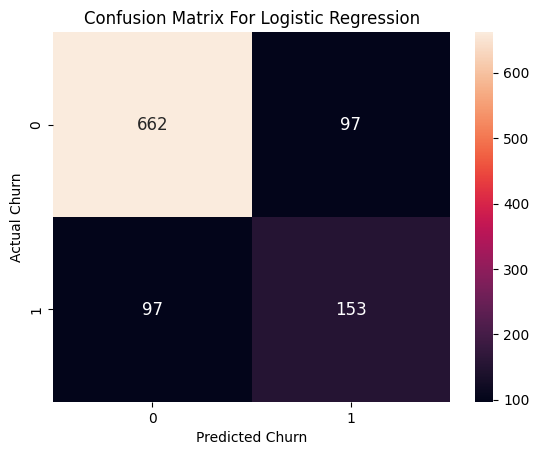

In [66]:
# Get the best performing model
best_model = metrics_table.sort_values(by="f1_score", ascending=False).iloc[0]

# Extract confusion matrix from the best model
conf_matrix = best_model['conf_matrix']

# Plot the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 12})

# Add labels and title
plt.xlabel('Predicted Churn')
plt.ylabel('Actual Churn')
plt.title('Confusion Matrix For Logistic Regression')

# Display the plot
plt.show()

#### **Interpretation of Confusion Matrix**
Positive class(Churn) = 1
Negative Class(Not Churn) = 0
TP = 153
FP = 97
FN = 97
TN = 662

- TP: Represents a section of the customers that the ML algorithm predicted them to Churn(Positive) and they actually Churn.
- FP: Represents a section of the customers where the ML model predicted them to Churn but they actually didn't churn.
- FN: Represents the section of customers where the ML model predicted them Not to Churn but they actually churn.
- TN: Section of the customers where the ML model predicted them Not to Churn and the actually didn't Churn.


### Training Dataset On Balanced Data

#### Upscaling Unbalanced Data Using Synthetic Minority Over-sampling Technique (SMOTE)

In [67]:
all_balanced_pipelines = {}

# define table to hold all the metrics
balanced_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

# loop through the models
for model_name, classifier in models:
# build final pipeline with preprocessor estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor',preprocessor),
        ('smote-sampler',SMOTE(random_state=42)),
        ('estimator', classifier)
    ])

    # fit training data to final pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # add models to all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # make prediction
    y_predict = balanced_pipeline.predict(X_val)

    # Generate Classification report for each pipeline or model
    balanced_metrics = classification_report(y_val_encoded, y_predict, output_dict=True)
        
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
balanced_metrics_table.sort_values(by="accuracy", ascending=False)

Learning rate set to 0.021973
0:	learn: 0.6825008	total: 7.28ms	remaining: 7.27s
1:	learn: 0.6733161	total: 13.6ms	remaining: 6.8s
2:	learn: 0.6643057	total: 19ms	remaining: 6.31s
3:	learn: 0.6550136	total: 26.6ms	remaining: 6.62s
4:	learn: 0.6463097	total: 32.6ms	remaining: 6.49s
5:	learn: 0.6385046	total: 39.7ms	remaining: 6.57s
6:	learn: 0.6310978	total: 45.6ms	remaining: 6.47s
7:	learn: 0.6239706	total: 51.8ms	remaining: 6.43s
8:	learn: 0.6165349	total: 58.9ms	remaining: 6.49s
9:	learn: 0.6100239	total: 65.1ms	remaining: 6.45s
10:	learn: 0.6044316	total: 72.6ms	remaining: 6.53s
11:	learn: 0.5987179	total: 78.5ms	remaining: 6.47s
12:	learn: 0.5933189	total: 84.8ms	remaining: 6.44s
13:	learn: 0.5878166	total: 91.4ms	remaining: 6.44s
14:	learn: 0.5822957	total: 97.4ms	remaining: 6.39s
15:	learn: 0.5784251	total: 105ms	remaining: 6.43s
16:	learn: 0.5739279	total: 111ms	remaining: 6.42s
17:	learn: 0.5690884	total: 118ms	remaining: 6.41s
18:	learn: 0.5647085	total: 124ms	remaining: 6.39s

,model_name,accuracy,precision,recall,f1_score,conf_matrix
5,catboost,0.772052,0.818066,0.772052,0.784328,"[[584, 175], [55, 195]]"
3,random_forest,0.749257,0.783812,0.749257,0.760566,"[[587, 172], [81, 169]]"
0,log_regression,0.743310,0.825063,0.743310,0.760160,"[[537, 222], [37, 213]]"
4,sgb_classiffier,0.741328,0.824338,0.741328,0.758362,"[[535, 224], [37, 213]]"
2,knn,0.733399,0.799314,0.733399,0.749785,"[[547, 212], [57, 193]]"
1,decision_tree,0.724480,0.765505,0.724480,0.737898,"[[569, 190], [88, 162]]"


#### Visualizing Model Performance On Balanced Data

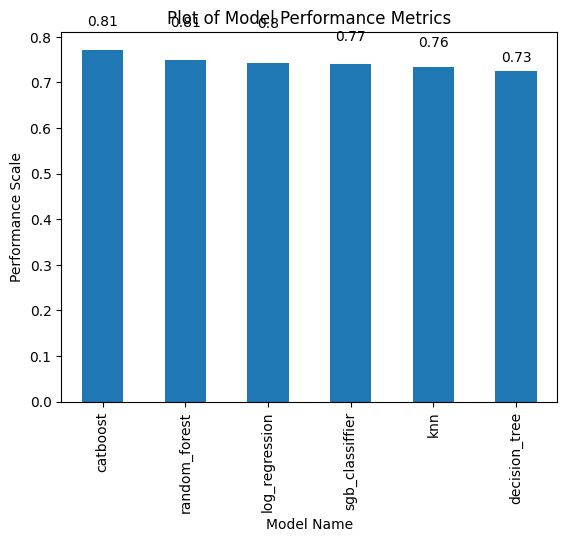

In [68]:
# set model_name as index
sorted_table = balanced_metrics_table.set_index("model_name")
# display metrics table based on the ascending order of accuracy
accuracy_scores = sorted_table["accuracy"].sort_values(ascending=False)

# reset_index to model_name

bar = accuracy_scores.plot(kind="bar")

# Add data labels to the bars
for i, v in enumerate(f1_scores):
    bar.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.title("Plot of Model Performance Metrics")
plt.xlabel("Model Name")
plt.ylabel("Performance Scale")
plt.show()

#### Key Insights On The Balanced Data Training
- Generally, the unbalanced data performed better than the balanced data.
- The metric used for accessing the models on the balanced datasets is accuracy.
- The top performing model in terms of accuracy is catboost with an accuracy of about 77%.
- The top 3 performing models in terms of accuracy are catboost, random_forest and logistic regression.


#### Visualizing The Best Performing Model Using Confusion Matrix on The Balanced Data

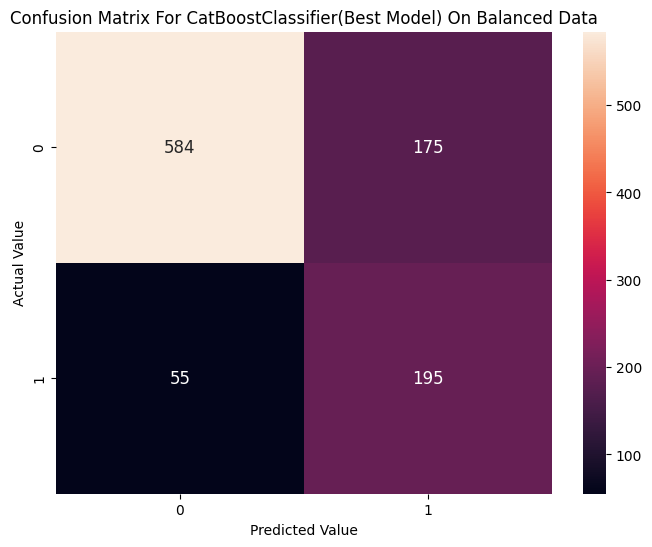

In [69]:
plt.figure(figsize=(8,6))
# Get the best performing model
best_model = balanced_metrics_table.sort_values(by="accuracy", ascending=False).iloc[0]

# Extract confusion matrix from the best model
conf_matrix = best_model['conf_matrix']

# Plot the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 12})

# Add labels and title
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix For CatBoostClassifier(Best Model) On Balanced Data')

# Display the plot
plt.show()

#### **Interpretation of Confusion Matrix**
Positive class(Not Churn) = 0 
Negative Class(Churn) = 1
- TP = 195
- FP = 55
- FN = 175
- TN = 584


#### Visualize Evaluation Using ROC-AUC

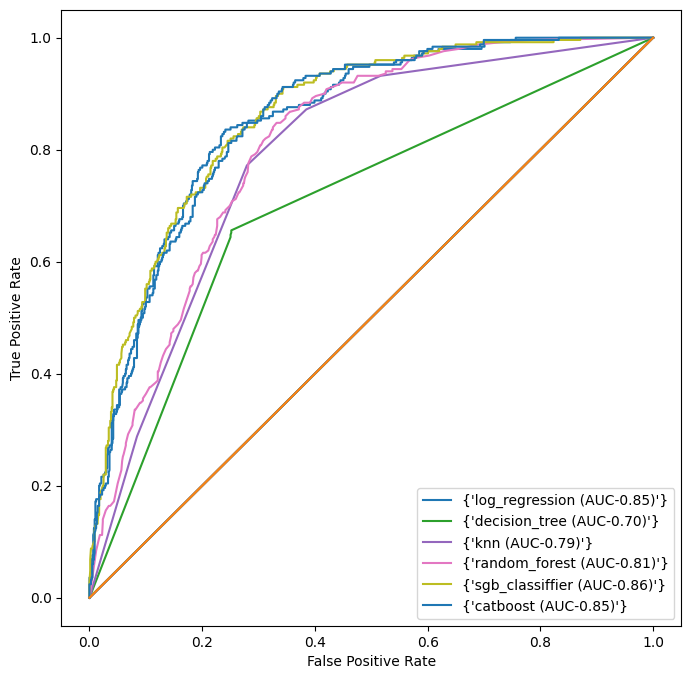

In [70]:
roc_data = {}

fig,ax = plt.subplots(figsize=(8,8))
# loop through all the models and pipeline 
for model_name,pipeline in all_pipelines.items():
    # get the predict probability from pipeline and store in a y_score variable 
    y_score = pipeline.predict_proba(X_val)[:, 1]
    #unpack roc_curve variables 
    fpr,tpr,threshold = roc_curve(y_val_encoded,y_score)
    roc_auc = auc(fpr,tpr)
    roc_auc_df = pd.DataFrame({"False Positive Rate":fpr,"True Positive Rate":tpr,"Threshold":threshold})
    roc_data[model_name] = roc_auc_df
    ax.plot(fpr,tpr,label={f'{model_name} (AUC-{roc_auc:.2f})'})
    ax.plot([0,1],[0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

plt.legend()
plt.show()

#### Business Impact Assesment
- The business focus is on the Negative Class, how our model is performing on predicting customers who churn. 
- The AUC curve shown below shows a good performance of our models with AUC-values above 70% which shows a good sign to be in production. 

## Model Evaluation
Based on the model performance from both the balanced and the unbalanced data, we decide to fine tune the following models for better performance
- Logistic Regression
- CatBoostClassifier
- StochasticGradientBoostClassifier

#### Hyperparameter Tuning Using RandomizedSearchCV

In [71]:
# Define parameter grid for the three models
params_grid = {
    'catboost': {
        'model__learning_rate': np.linspace(0, 0.3),
        'model__depth': randint(3, 10),
        'model__l2_leaf_reg': randint(2, 6),
        'model__rsm': uniform(0.5, 1)
    },
    'sgb_classifier': {
        'model__learning_rate': np.linspace(0, 0.3),
        'model__max_depth': randint(3, 10),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 20)
    },
    'log_regression': {
        'model__C': uniform(0.1, 10),
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'saga']
    }
}

# Initialize dictionary to store best params and best model
best_models = {}
best_params = {}

# Perform hyperparameter tuning on each model
for model_name, params in params_grid.items():
    # Create Pipeline object
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', CatBoostClassifier() if model_name == 'catboost' else
         GradientBoostingClassifier() if model_name == 'sgb_classifier' else
         LogisticRegression())
    ])

    # Create RandomizedSearch object
    random_cv = RandomizedSearchCV(estimator=final_pipeline, param_distributions=params, cv=5, n_iter=100, random_state=42, n_jobs=-1)
    
    # Fit RandomizedSearch object on data
    random_cv.fit(X_train, y_train_encoded)

    # Get best params and best model
    best_params[model_name] = random_cv.best_params_
    best_models[model_name] = random_cv.best_estimator_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"The best parameters for {model_name}: {params}")

#### Making Predictions Using The Fine-Tuned Models

In [ ]:
# define table to hold all the metrics
tuned_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

tuned_metrics = {}
for model_name,model in best_models.items():
    # make predictions on the fine_tuned model
    y_tuned_predict = model.predict(X_val)

    # Generate classification report for each model
    tuned_metrics = classification_report(y_val_encoded,y_tuned_predict,output_dict=True)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy =tuned_metrics['accuracy']
    precision =tuned_metrics['weighted avg']['precision']
    recall =tuned_metrics['weighted avg']['recall']
    f1_score =tuned_metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    tuned_metrics_table.loc[len(tuned_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
tuned_metrics_table.sort_values(by="f1_score", ascending=False)


,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,catboost,0.814668,0.808711,0.814668,0.810998,"[[584, 175], [55, 195]]"
2,log_regression,0.807730,0.807730,0.807730,0.807730,"[[584, 175], [55, 195]]"
1,sgb_classifier,0.808722,0.803760,0.808722,0.805834,"[[584, 175], [55, 195]]"


#### Key Insights
- From the F Table Above, catboost gave the best performance with an f1-score of 81% after finetuning as compared to 80.07% percent before fine-tuning.

In [ ]:
# set model_name as index
tuned_metrics_table.set_index("model_name",inplace=True)

# Extract F1-score column and sort values in ascending order
f1_scores = tuned_metrics_table["f1_score"].sort_values(ascending=False)

# Plot F1-score as a bar plot
f1_scores.plot(kind="bar")

# Add title and labels
plt.title("F1-score of Models After Fine-Tuning")
plt.xlabel("Model Name")
plt.ylabel("F1-score")
plt.show()

KeyError: "None of ['model_name'] are in the columns"

## Making Prediction On The Test Data


#### Loading The Test Data

In [ ]:
test_data = pd.read_excel("../data/Telco-churn-last-2000.xlsx")

In [ ]:
# Preview the test data
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


#### Preprocessing The Test Data

In [ ]:
# Renaming Columns
columns = {"tenure":"Tenure","gender":"Gender","customerID":"CustomerID"}
test_data.rename(columns=columns,inplace=True)

In [ ]:
# Selecting Relevant Column To Be Used For Preprocessing
relevant_columns = ["Tenure","PaymentMethod", "MonthlyCharges","Contract","PaperlessBilling","Dependents"]
X_test = test_data[relevant_columns]
X_test.head()

,Tenure,PaymentMethod,MonthlyCharges,Contract,PaperlessBilling,Dependents
0,12,Electronic check,84.45,Month-to-month,Yes,No
1,9,Mailed check,20.40,Month-to-month,No,No
2,27,Electronic check,81.70,One year,No,No
3,27,Electronic check,79.50,Month-to-month,Yes,Yes
4,1,Mailed check,89.15,Month-to-month,No,Yes


In [ ]:
# set the best model 
best_estimator = best_models['catboost']
best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   RobustScaler()),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['PaymentMethod', 'Contract', 'PaperlessBilling', 'Dependents'], dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000002301782A000>)])

#### Making Predictions On The Test Data

In [ ]:
# instantiating the fine-tuned catboost model
y_test_predicted = best_estimator.predict(X_test)
y_test_predicted

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Persist Model

In [ ]:
destination = os.path.join('.','model_export')

In [ ]:
with open('best_estimator.pkl','wb') as file:
    pickle.dump(best_estimator,file) 